In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
csvread = csv.reader(open("Car_Purchasing_Data.csv"))
fields = next(csvread)
data = np.array([i for i in csvread])
req_data  = np.array(data[:,3:],dtype=float)
X_train = req_data[:400,:5,]
Y_train = req_data[:400,5:]
X_test = req_data[400:,:5]
Y_test = req_data[400:,5:]

Accuracy on training set: 0.9990100384156251
Accuracy on test set: 0.9986432969655229


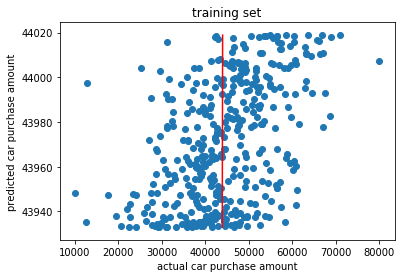

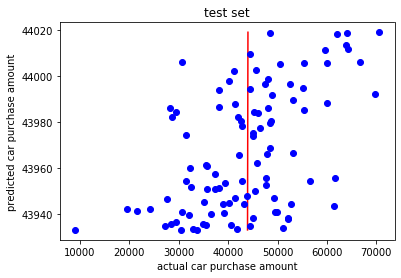

In [3]:
#training
reg= SVR(kernel="rbf",gamma="scale")
reg.fit(X_train,Y_train.ravel())
print("Accuracy on training set:",1-reg.score(X_train,Y_train.ravel()))
print("Accuracy on test set:" ,1-reg.score(X_test,Y_test.ravel()))
y_p1 = reg.predict(X_train)
y_p2 = reg.predict(X_test)
X_grid1 = np.arange(min(y_p1), max(y_p1), 0.01) 
X_grid2 = np.arange(min(y_p2),max(y_p2),0.01)
#X_grid1 = X_grid1.reshape((len(X_grid1), 1))
fig,ax = plt.subplots()
ax.plot(X_grid1,X_grid1,c="red")
ax.scatter(Y_train,y_p1)
ax.set_xlabel("actual car purchase amount")
ax.set_ylabel("predicted car purchase amount")
ax.set_title("training set")
fig1,ax1 = plt.subplots()
ax1.plot(X_grid2,X_grid2,c="red")
ax1.plot(Y_test,y_p2,"bo")
ax1.set_xlabel("actual car purchase amount")
ax1.set_ylabel("predicted car purchase amount")
ax1.set_title("test set")
plt.show()

In [4]:
index =1 #0 to 199
for i in range(6):
    print(fields[3+i],":",req_data[400+index,i])
print("Predicted Car Purchase Amount:",y_p2[index])

Gender : 0.0
Age : 48.59322101
Annual Salary : 63718.8812
Credit Card Debt : 11863.06428
Net Worth : 298920.0067
Car Purchase Amount : 43242.58224
Predicted Car Purchase Amount: 43944.45713399062
